# Breast Cancer synthetic data
## Part 3. Modeling

#### by Grzegorz Furdyn

## Contents

#### CRISP-DM Phase 3: Data Preparation
* [Missing values handling](#miss)

#### CRISP-DM Phase 4: Modeling
* [KNN](#knn)
* [Logistic Regression](#lr)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', 1000)
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,plot_confusion_matrix
from sklearn.metrics import precision_recall_curve,plot_precision_recall_curve,plot_roc_curve
from sklearn import metrics, set_config
set_config(display="diagram")
np.random.seed(42)
RANDOM_STATE = 42
TEST_SIZE = 0.2

In [2]:
df = pd.read_csv('Breast Cancer SEER 2010 2014.csv')

## CRISP-DM Phase 3: Data Preparation

<a id='miss'></a>
### Missing values handling

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214684 entries, 0 to 214683
Data columns (total 53 columns):
 #   Column                                                Non-Null Count   Dtype 
---  ------                                                --------------   ----- 
 0   Age recode with <1 year olds                          214684 non-null  object
 1   Year of diagnosis                                     214684 non-null  int64 
 2   Primary Site - labeled                                214684 non-null  object
 3   Primary Site                                          214684 non-null  int64 
 4   Histologic Type ICD-O-3                               214684 non-null  int64 
 5   Grade (thru 2017)                                     214684 non-null  object
 6   Laterality                                            214684 non-null  object
 7   Diagnostic Confirmation                               214684 non-null  object
 8   ICD-O-3 Hist/behav                                    

In [5]:
df.head(5).transpose()

,0,1,2,3,4
Age recode with <1 year olds,40-44 years,80-84 years,55-59 years,60-64 years,50-54 years
Year of diagnosis,2013,2012,2014,2010,2011
Primary Site - labeled,"C50.9-Breast, NOS",C50.2-Upper-inner quadrant of breast,C50.8-Overlapping lesion of breast,"C50.9-Breast, NOS",C50.4-Upper-outer quadrant of breast
Primary Site,509,502,508,509,504
Histologic Type ICD-O-3,8010,8500,8500,8500,8500
Grade (thru 2017),Unknown,Moderately differentiated; Grade II,Moderately differentiated; Grade II,Moderately differentiated; Grade II,Poorly differentiated; Grade III
Laterality,Right - origin of primary,Right - origin of primary,Right - origin of primary,Right - origin of primary,Left - origin of primary
Diagnostic Confirmation,Positive histology,Positive histology,Positive histology,Positive histology,Positive histology
ICD-O-3 Hist/behav,"8010/3: Carcinoma, NOS","8500/3: Infiltrating duct carcinoma, NOS","8500/3: Infiltrating duct carcinoma, NOS","8500/3: Infiltrating duct carcinoma, NOS","8500/3: Infiltrating duct carcinoma, NOS"
Combined Summary Stage (2004+),Unknown/unstaged,Localized,Localized,Localized,Localized


In [6]:
df.corr()

,Year of diagnosis,Primary Site,Histologic Type ICD-O-3,RX Summ--Surg Prim Site (1998+),Regional nodes examined (1988+),Regional nodes positive (1988+),CS tumor size (2004-2015),CS extension (2004-2015),CS lymph nodes (2004-2015),CS mets at dx (2004-2015),CS Tumor Size/Ext Eval (2004-2015),CS Reg Node Eval (2004-2015),CS Mets Eval (2004-2015),Record number recode,Total number of benign/borderline tumors for patient,Patient ID
Year of diagnosis,1.000000,-0.007646,0.006525,-0.030692,-0.015778,0.018098,-0.016953,-0.006923,-0.022636,-0.010899,-0.012283,-0.007223,-0.010884,0.015475,-0.003248,0.006594
Primary Site,-0.007646,1.000000,-0.131045,0.027432,0.119313,0.130631,0.171716,0.204956,0.166648,0.170526,0.041124,0.048153,0.145441,0.014846,-0.006498,0.002878
Histologic Type ICD-O-3,0.006525,-0.131045,1.000000,0.025631,-0.260846,-0.238838,-0.316102,-0.413995,-0.288922,-0.375240,-0.130056,-0.150284,-0.360166,0.002702,0.000678,-0.030203
RX Summ--Surg Prim Site (1998+),-0.030692,0.027432,0.025631,1.000000,0.113613,-0.279760,-0.042436,-0.059418,0.047556,-0.102726,0.376754,0.296877,0.021544,0.020036,-0.001721,0.032641
Regional nodes examined (1988+),-0.015778,0.119313,-0.260846,0.113613,1.000000,0.240010,0.290021,0.381213,0.469559,0.387279,0.222232,0.285719,0.400841,-0.036143,-0.002826,0.032873
Regional nodes positive (1988+),0.018098,0.130631,-0.238838,-0.279760,0.240010,1.000000,0.341317,0.408441,0.331490,0.446040,-0.194249,-0.386442,0.317037,0.122515,0.000577,0.018008
CS tumor size (2004-2015),-0.016953,0.171716,-0.316102,-0.042436,0.290021,0.341317,1.000000,0.516471,0.373663,0.434816,0.139447,0.147804,0.409076,0.013872,-0.006328,0.027842
CS extension (2004-2015),-0.006923,0.204956,-0.413995,-0.059418,0.381213,0.408441,0.516471,1.000000,0.547161,0.601048,0.187492,0.218958,0.521636,0.000052,-0.003233,0.030262
CS lymph nodes (2004-2015),-0.022636,0.166648,-0.288922,0.047556,0.469559,0.331490,0.373663,0.547161,1.000000,0.553009,0.180812,0.329346,0.466383,-0.040707,-0.002034,0.029476
CS mets at dx (2004-2015),-0.010899,0.170526,-0.375240,-0.102726,0.387279,0.446040,0.434816,0.601048,0.553009,1.000000,0.127694,0.203805,0.773812,-0.003208,-0.000341,0.023077


<AxesSubplot:>

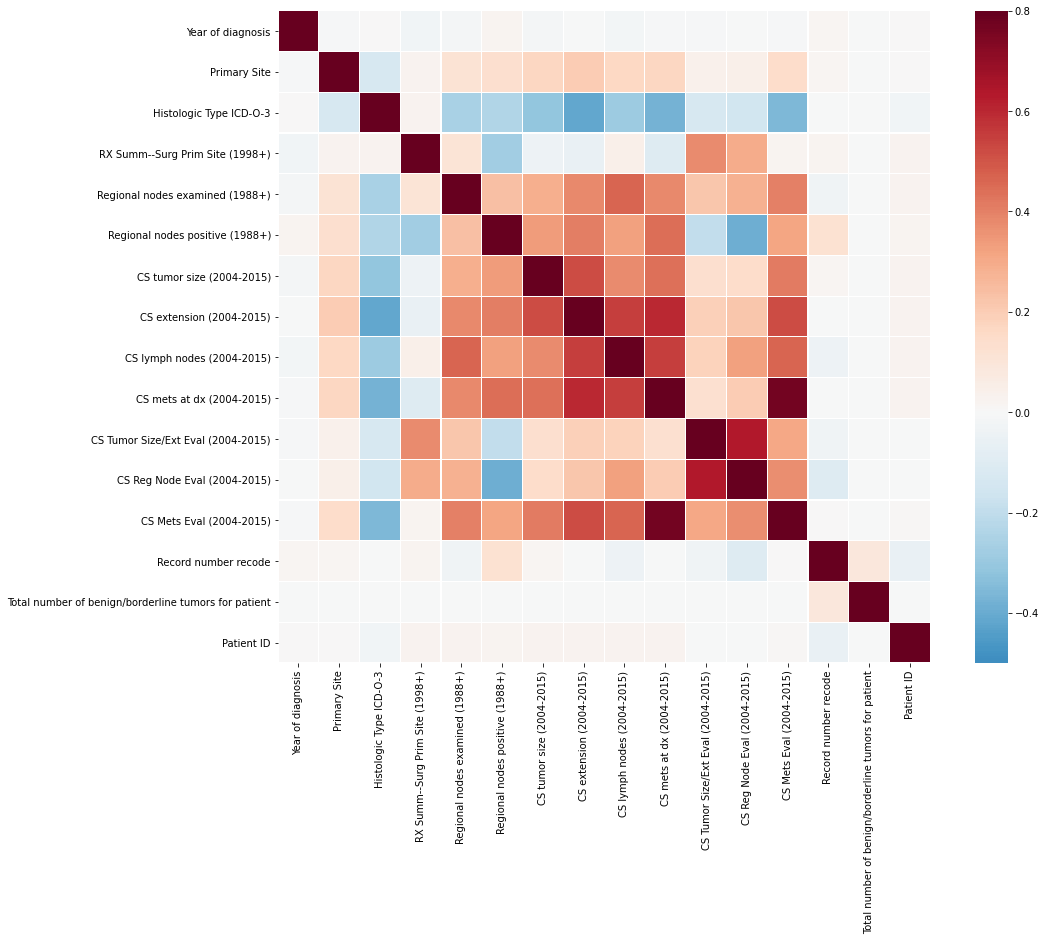

In [7]:
plt.figure(figsize=(16,12))
sns.heatmap(data = df.corr(), annot = False, cmap = 'RdBu_r', linewidths=.2, square=True, vmax=0.8, vmin = -0.5, center = 0)

Defining subset of features as X

In [5]:
df = df[['leeft', 'incjr', 'vit_stat', 'vit_stat_int', 'tumsoort', 'diag_basis',
       'topo_sublok', 'later', 'morf', 'gedrag', 'diffgrad', 'ct', 'cn', 'cm',
       'pt', 'pn', 'pm', 'stadium', 'cstadium', 'pstadium', 'ond_lymf',
       'pos_lymf', 'er_stat', 'pr_stat', 'her2_stat', 'dcis_comp', 'multifoc',
       'tum_afm', 'swk', 'swk_uitslag', 'mari', 'mari_uitslag', 'okd',
       'org_chir', 'uitgebr_chir_code', 'dir_reconstr', 'chemo', 'target',
       'horm', 'rt', 'meta_rt', 'meta_chir', 'survival_5Y',
       'years_after_diagnosis', 'stadiumtot', 'pos_lymf_range', 'pos_lymf_ind',
       'age_range', 'tum_afm_range', 'stadium_ord', 'cstadium_ord',
       'pstadium_ord', 'cn_ord', 'ct_ord', 'pt_ord', 'pn_ord',
       'vit_stat_int_round']]

In [6]:
categorical_features = [ 'tumsoort',
                         'diag_basis',
                         'topo_sublok',
                         'later',
                         'morf',
                         'gedrag',
                         'ct',
                         'cn',
                         'cm',
                         'pt',
                         'pn',
                         'pm',
                         'stadium',
                         'cstadium', 
                         'pstadium',
                         'er_stat',
                         'pr_stat',
                         'her2_stat',
                         'dcis_comp',
                         'multifoc',
                         'swk',
                         'swk_uitslag',
                         'mari',
                         'mari_uitslag',
                         'okd',
                         'org_chir',
                         'uitgebr_chir_code',
                         'dir_reconstr',
                         'chemo',
                         'target',
                         'horm',
                         'rt',
                         'meta_rt',
                         'meta_chir']

In [7]:
numeric_features = [ 'leeft',
                     'incjr',
                     'vit_stat_int',
                     'diffgrad',
                     'ond_lymf',
                     'pos_lymf',
                     'tum_afm']

In [8]:
numeric_features

['leeft',
 'incjr',
 'vit_stat_int',
 'diffgrad',
 'ond_lymf',
 'pos_lymf',
 'tum_afm']

In [9]:
df[numeric_features].describe()

,leeft,incjr,vit_stat_int,diffgrad,ond_lymf,pos_lymf,tum_afm
count,58377.000000,58377.000000,58377.000000,49392.000000,58065.000000,53897.000000,45312.000000
mean,61.855628,2014.733268,1748.631070,2.063107,6.134539,2.376403,21.789261
std,14.216831,2.908916,1020.057571,0.735689,14.856732,12.004611,26.434893
min,18.000000,2010.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,53.000000,2012.000000,870.000000,2.000000,1.000000,0.000000,8.000000
50%,62.000000,2015.000000,1646.000000,2.000000,2.000000,0.000000,15.000000
75%,71.000000,2017.000000,2562.000000,3.000000,5.000000,1.000000,24.000000
max,105.000000,2019.000000,4047.000000,3.000000,99.000000,99.000000,250.000000


In [10]:
df.isna().sum()[df.isna().sum() != 0].sort_values(ascending = False)

mari_uitslag             54936
pm                       53169
mari                     27487
years_after_diagnosis    19446
swk_uitslag              16680
tum_afm_range            15533
dcis_comp                13487
tum_afm                  13065
her2_stat                 9629
diffgrad                  8985
er_stat                   7965
pn_ord                    7813
pn                        7813
pr_stat                   7060
pt                        5568
pt_ord                    5568
uitgebr_chir_code         5425
pstadium_ord              5355
pstadium                  5355
pos_lymf                  4480
multifoc                  2569
cm                        2472
swk                       2356
later                     1306
cstadium                  1142
cstadium_ord              1142
ct_ord                     871
ct                         871
cn                         837
cn_ord                     837
stadium                    313
stadiumtot                 313
stadium_

In [11]:
df[numeric_features] = df[numeric_features].fillna(df[numeric_features].median())

In [12]:
df.isna().sum()[df.isna().sum() != 0].sort_values(ascending = False)

mari_uitslag             54936
pm                       53169
mari                     27487
years_after_diagnosis    19446
swk_uitslag              16680
tum_afm_range            15533
dcis_comp                13487
her2_stat                 9629
er_stat                   7965
pn_ord                    7813
pn                        7813
pr_stat                   7060
pt                        5568
pt_ord                    5568
uitgebr_chir_code         5425
pstadium_ord              5355
pstadium                  5355
multifoc                  2569
cm                        2472
swk                       2356
later                     1306
cstadium                  1142
cstadium_ord              1142
ct                         871
ct_ord                     871
cn_ord                     837
cn                         837
stadiumtot                 313
stadium_ord                313
stadium                    313
dtype: int64

In [31]:
df[categorical_features] = df[categorical_features].astype('str')

## CRISP-DM Phase 4: Modeling

<a id='knn'></a>
### KNN

In [32]:
#categorical_features

In [33]:
numeric_features

['leeft',
 'incjr',
 'vit_stat_int',
 'diffgrad',
 'ond_lymf',
 'pos_lymf',
 'tum_afm']

In [34]:
def preprocess(df):
    df_fin = pd.merge(df[categorical_features], df[numeric_features], left_index=True, right_index=True)
    df_fin = df_fin.join(df['vit_stat'])
    return df_fin

In [35]:
df = preprocess(df)

In [36]:
df.head()

,tumsoort,diag_basis,topo_sublok,later,morf,gedrag,ct,cn,cm,pt,...,meta_rt,meta_chir,leeft,incjr,vit_stat_int,diffgrad,ond_lymf,pos_lymf,tum_afm,vit_stat
0,501300,7,C508,1.0,8500,3,1C,0,0.0,1C,...,0.0,0.0,93,2013,390,2.0,2.0,0.0,28.0,1
1,503200,2,C505,1.0,8520,2,1C,0,0.0,nan,...,0.0,0.0,60,2010,3592,2.0,1.0,0.0,19.0,0
2,502200,7,C508,2.0,8500,2,IS,0,0.0,0,...,0.0,0.0,43,2010,4011,1.0,9.0,0.0,21.0,0
3,501300,7,C504,1.0,8481,3,1B,0,0.0,1C,...,0.0,0.0,38,2012,2811,2.0,1.0,0.0,12.0,0
4,501300,7,C504,2.0,8500,3,1C,0,0.0,1C,...,0.0,0.0,29,2019,724,1.0,1.0,0.0,19.0,0


In [37]:
X = df.drop('vit_stat', axis = 1)

In [38]:
y = df['vit_stat']

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE, random_state=RANDOM_STATE)

In [40]:
X_train.shape

(46701, 41)

In [41]:
y_train.shape

(46701,)

In [42]:
X_test.shape

(11676, 41)

In [43]:
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

In [44]:
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

In [45]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

In [46]:
model_KNN = KNeighborsClassifier()

In [47]:
rf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', model_KNN)])

In [48]:
rf.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['leeft', 'incjr',
                                                   'vit_stat_int', 'diffgrad',
                                                   'ond_lymf', 'pos_lymf',
                                                   'tum_afm']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEnco...gnore'))]),
                                                  ['tumsoort', 'diag_basis',
                                                   'topo_sublok', 'later',
                                                   'morf', 'gedrag', 'ct', 'cn',
                                                   'cm', 'pt', 'pn', 'pm',
                                                   'stadium', 'cstadium',
                                                   'pstadium', 'er_stat',
                                                   'pr_stat', 'her2_stat',
                                                   'dcis_comp', 'multifoc',
                                                   'swk', 'swk_uitslag', 'mari',
                                                   'mari_uitslag', 'okd',
                                                   'org_chir',
                                                   'uitgebr_chir_code',
                                                   'dir_reconstr', 'chemo',
                                                   'target', ...])])),
                ('classifier', KNeighborsClassifier())])

In [49]:
y_pred_rf =rf.predict(X_test)

In [50]:
confusion_matrix(y_test,y_pred_rf)

array([[9184,  231],
       [1487,  774]], dtype=int64)

In [51]:
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.86      0.98      0.91      9415
           1       0.77      0.34      0.47      2261

    accuracy                           0.85     11676
   macro avg       0.82      0.66      0.69     11676
weighted avg       0.84      0.85      0.83     11676



<a id='lr'></a>
### Logistic Regression

In [52]:
model_LR = LogisticRegressionCV()

In [53]:
rf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', model_LR)])

In [54]:
rf.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['leeft', 'incjr',
                                                   'vit_stat_int', 'diffgrad',
                                                   'ond_lymf', 'pos_lymf',
                                                   'tum_afm']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEnco...gnore'))]),
                                                  ['tumsoort', 'diag_basis',
                                                   'topo_sublok', 'later',
                                                   'morf', 'gedrag', 'ct', 'cn',
                                                   'cm', 'pt', 'pn', 'pm',
                                                   'stadium', 'cstadium',
                                                   'pstadium', 'er_stat',
                                                   'pr_stat', 'her2_stat',
                                                   'dcis_comp', 'multifoc',
                                                   'swk', 'swk_uitslag', 'mari',
                                                   'mari_uitslag', 'okd',
                                                   'org_chir',
                                                   'uitgebr_chir_code',
                                                   'dir_reconstr', 'chemo',
                                                   'target', ...])])),
                ('classifier', LogisticRegressionCV())])

In [55]:
y_pred_rf =rf.predict(X_test)

In [56]:
confusion_matrix(y_test,y_pred_rf)

array([[9189,  226],
       [ 822, 1439]], dtype=int64)

In [57]:
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95      9415
           1       0.86      0.64      0.73      2261

    accuracy                           0.91     11676
   macro avg       0.89      0.81      0.84     11676
weighted avg       0.91      0.91      0.90     11676



In [58]:
plot_roc_curve(model_LR, X_test, y_test)

ValueError: could not convert string to float: 'C504'